## Group No - 227

## Group Member Names:
1. Mahesh Chandra Sonker: 2020SC04397
2. Devesh Chandra Bisht: 2020SC04896
3. Jithu Nair: 2020SC04149



# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?



# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves which should be a website which has the required data in it. You have to write Python crawler code to scrape data from the respective website rather than downloading ready-made dataset as such from sources like Kaggle etc. 

(Data downloaded from website like Kaggle will be awarded negative marks.)

## 2.1 Code for scraping data from website



In [1]:
##---------Type the code below this line------------------##
from itertools import count
from google_play_scraper import Sort, reviews_all
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as mp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

us_reviews = reviews_all(
    'com.asort.asortplus',
    lang='en',
    country='us',
    sort=Sort.MOST_RELEVANT,
    count=1
)

## 2.2 Code for converting the above scraped data into a dataframe

In [2]:
df_org = pd.DataFrame(np.array(us_reviews),columns=['review'])
df_org = df_org.join(pd.DataFrame(df_org.pop('review').tolist()))
# Saving data for later use
df_org.to_csv('play_store.csv')

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
##---------Type the code below this line------------------##
df_org.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFYwbD4OEIa9m9a5djSxJ3KEjnXROwWKR6hVc2...,Suyog Jadhav,https://play-lh.googleusercontent.com/a-/AOh14...,"Too much lag , return facility not available, ...",1,0,1.55.5,2022-02-22 05:57:17,None,None
1,gp:AOqpTOHQM4epnfV7bRB-lmmjhveMTVg7cg4k-iziXXf...,Dharmendra Rathod,https://play-lh.googleusercontent.com/a/AATXAJ...,There is a lot of rubbish cloth and the price ...,1,0,1.55.5,2022-02-24 21:50:57,None,None
2,gp:AOqpTOHmQZ8Ehhir6j1qtyQyMutlSXzJqiuJcvqpGJ_...,Parmar Jalpa,https://play-lh.googleusercontent.com/a/AATXAJ...,Asort platform is best for all category nd all...,5,10,1.55.4,2022-01-03 10:35:20,None,None
3,gp:AOqpTOGbx8Bs6RR2KvJNHGM1vNLCGFATRGk0RTA-rRt...,Kashinath Badade,https://play-lh.googleusercontent.com/a-/AOh14...,Asort is best shopping application and this pr...,5,5,1.55.4,2022-01-14 15:48:43,None,None
4,gp:AOqpTOGSs9wSYTplyCGP48AGyS-DfAnCsbdy2l3ukhg...,Nilesh kelgane,https://play-lh.googleusercontent.com/a-/AOh14...,asort is the best platform for products that w...,5,10,1.55.4,2022-01-01 14:29:18,None,None


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [4]:
##---------Type the code below this line------------------##
print("Columns:")
print(list(df_org.columns))
print("----------------------------------------------")
print("Size of data:", df_org.shape)
print("----------------------------------------------")
print("Description:")
print(df_org.describe())

Columns:
['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']
----------------------------------------------
Size of data: (737, 10)
----------------------------------------------
Description:
            score  thumbsUpCount
count  737.000000     737.000000
mean     4.455902       3.107191
std      1.332504      11.132754
min      1.000000       0.000000
25%      5.000000       0.000000
50%      5.000000       0.000000
75%      5.000000       1.000000
max      5.000000     144.000000


## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?


In [5]:
print("Size of dataset: ", df_org.size)
print("----------------------------------------------")
print("Attributes:")
print(df_org.dtypes);
print("----------------------------------------------")
print("Checking for null values:")
if(df_org.isnull().sum().sum() > 0):
    print("There are null values w.r.t below mentioned colums")
    print("----------------------------------------------")
    print(df_org.isnull().sum())
else:
    print("There are no null values.")

Size of dataset:  7370
----------------------------------------------
Attributes:
reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt                       object
dtype: object
----------------------------------------------
Checking for null values:
There are null values w.r.t below mentioned colums
----------------------------------------------
reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion    172
at                        0
replyContent            737
repliedAt               737
dtype: int64


# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [6]:
##---------Type the code below this line------------------##
columns = list(df_org.columns)
print("Unique values in each attribute")
print("----------------------------------------------")
for column in columns:
    print(column,": ", len(column))


Unique values in each attribute
----------------------------------------------
reviewId :  8
userName :  8
userImage :  9
content :  7
score :  5
thumbsUpCount :  13
reviewCreatedVersion :  20
at :  2
replyContent :  12
repliedAt :  9


## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [7]:
##---------Type the code below this line------------------##
duplicate = df_org[df_org.duplicated()]
if(len(duplicate) > 0):
    print("Duplicate Rows : ", duplicate)
else:
    print("No duplicate data found.")

No duplicate data found.


## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [8]:
##---------Type the code below this line------------------##
print("Checking for missing values:")
if(df_org.isnull().sum().sum() > 0):
    print("There are missing values w.r.t below mentioned colums")
    print("----------------------------------------------")
    print(df_org.isnull().sum())
else:
    print("There are no missing values.")
    
# df_org.dropna()
# df_org.columns


Checking for missing values:
There are missing values w.r.t below mentioned colums
----------------------------------------------
reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion    172
at                        0
replyContent            737
repliedAt               737
dtype: int64


## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [9]:
##---------Type the code below this line------------------##
#In our use case we dont need colums reviewId, userName, userImage, reviewCreatedVersion, at, replyContent, repliedAt
# So we will drop those colums
try:
    df_org.drop(df_org.columns[[0, 1, 2, 3, 6, 7, 8, 9]], axis = 1, inplace = True)
except:
    print("Columns not found!!")
print("Final Dataframe columns:")
print(list(df_org.columns))

Final Dataframe columns:
['score', 'thumbsUpCount']


## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [10]:
# For this we will check for the unique type for all the attributes
attributes = df_org.columns
print("Attribute : Result")
for attribute in attributes:
    if(len(df_org[attribute].map(type).unique()) == 1):
        print(attribute, ": Data is consistent")
    else:
        print(attribute, ": Data is not consistent")

Attribute : Result
score : Data is consistent
thumbsUpCount : Data is consistent


## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [11]:
print("As we can see from above that data is consistent")
print("If data is not consistent, we will drop that row")

As we can see from above that data is consistent
If data is not consistent, we will drop that row


## 3.7 Identify the target variables.


In [12]:
# Inour case target valraible is score which has below unique values.
df_org['score'].unique()

array([1, 5, 4, 2, 3])

## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [13]:
##---------Type the code below this line------------------##
try:
    y_class = df_org[['score']]
    df_org.drop(['score'], axis = 1, inplace = True)
except:
    print("Column not found!")

In [14]:
# As we are using Review data for the classification then we need to perform sentiment analysis to identify
# +ve words and -ve words for getting sentiment score

#Data set used for NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

df = pd.read_csv('play_store.csv', usecols=['content'])
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize
preprocess_tag = [text_prep(i) for i in df['content']]
df["preprocess_txt"] = preprocess_tag
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg
df['sentiment'] = round(df['pos_count'] / (df['neg_count']+1), 2)
print(df.head())
print(list(df.columns))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mahesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mahesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mahesh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                             content  \
0  Too much lag , return facility not available, ...   
1  There is a lot of rubbish cloth and the price ...   
2  Asort platform is best for all category nd all...   
3  Asort is best shopping application and this pr...   
4  asort is the best platform for products that w...   

                                      preprocess_txt  pos_count  neg_count  \
0  [much, lag, return, facility, available, high,...          2          1   
1  [lot, rubbish, cloth, price, high, clothes, ne...          0          1   
2  [asort, platform, best, category, nd, generati...          2          0   
3  [asort, best, shopping, application, product, ...          2          0   
4  [asort, best, platform, product, need, daily, ...          2          0   

   sentiment  
0        1.0  
1        0.0  
2        2.0  
3        2.0  
4        2.0  
['content', 'preprocess_txt', 'pos_count', 'neg_count', 'sentiment']


In [15]:
df.head()

,content,preprocess_txt,pos_count,neg_count,sentiment
0,"Too much lag , return facility not available, ...","[much, lag, return, facility, available, high,...",2,1,1.0
1,There is a lot of rubbish cloth and the price ...,"[lot, rubbish, cloth, price, high, clothes, ne...",0,1,0.0
2,Asort platform is best for all category nd all...,"[asort, platform, best, category, nd, generati...",2,0,2.0
3,Asort is best shopping application and this pr...,"[asort, best, shopping, application, product, ...",2,0,2.0
4,asort is the best platform for products that w...,"[asort, best, platform, product, need, daily, ...",2,0,2.0


In [16]:
df_org.head()

,thumbsUpCount
0,0
1,0
2,10
3,5
4,10


## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


In [17]:
# We will check for the values of y, if there is some categorical value, then we will assign nominal values
# by using below LabelEncoder.

# labelencoder= LabelEncoder()
# y['score'] = labelencoder.fit_transform(y['score']) 
try:
    df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
except:
    print("Columns not found!!")

In [18]:
df.head()

,pos_count,neg_count,sentiment
0,2,1,1.0
1,0,1,0.0
2,2,0,2.0
3,2,0,2.0
4,2,0,2.0


In [19]:
df_new = df_org.join(df)
df_new.head()

,thumbsUpCount,pos_count,neg_count,sentiment
0,0,2,1,1.0
1,0,0,1,0.0
2,10,2,0,2.0
3,5,2,0,2.0
4,10,2,0,2.0


In [20]:
print(y_class.shape)
print(df_new.shape)

(737, 1)
(737, 4)


In [21]:
df_new.loc[df_new['sentiment'] > 5.0]

,thumbsUpCount,pos_count,neg_count,sentiment
61,144,7,0,7.0
71,0,6,0,6.0
251,0,16,1,8.0
311,0,8,0,8.0


In [22]:
df_new = df_new.drop(df_new.index[[62,75,251,321]])
y_class = y_class.drop(y_class.index[[62,75,251,321]])

In [23]:
print(df_new.shape)
print(y_class.shape)

(733, 4)
(733, 1)


In [24]:
df_new.loc[df_new['sentiment'] > 5.0]

,thumbsUpCount,pos_count,neg_count,sentiment
61,144,7,0,7.0
71,0,6,0,6.0
311,0,8,0,8.0


# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

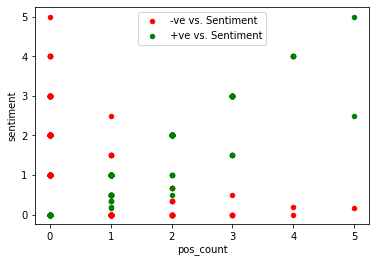

In [581]:
##---------Type the code below this line------------------##
ax1 = df_new.plot(x="neg_count", y="sentiment", kind="scatter", color='r', label="-ve vs. Sentiment")
ax2 = df_new.plot(x="pos_count", y="sentiment", kind="scatter", color='g',label="+ve vs. Sentiment", ax=ax1)
# ax3 = df_new.plot(x="thumbsUpCount", y="sentiment", kind="scatter", color='b', label="Thumps vs. Sentiment", ax=ax1)
mp.show()

In [25]:
df_new.head()

,thumbsUpCount,pos_count,neg_count,sentiment
0,0,2,1,1.0
1,0,0,1,0.0
2,10,2,0,2.0
3,5,2,0,2.0
4,10,2,0,2.0


## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.


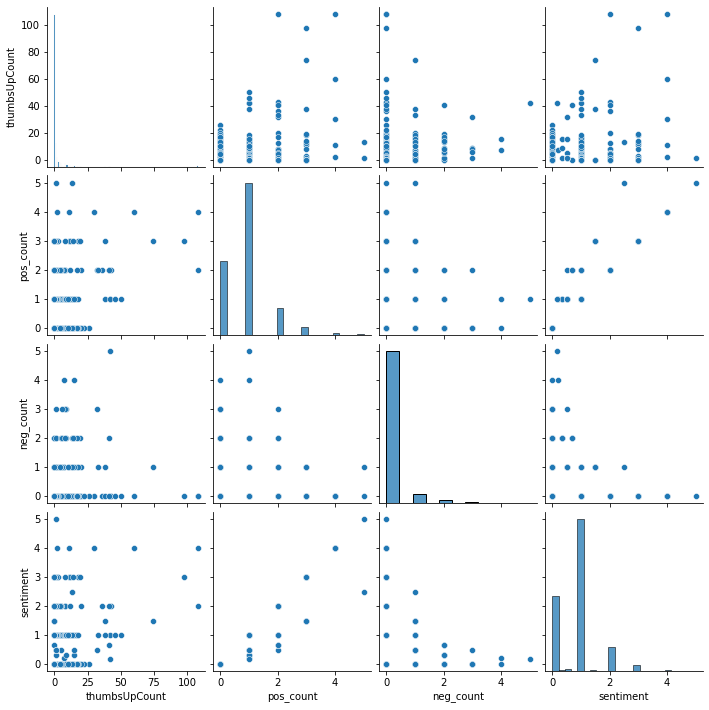

In [582]:
sns.pairplot(df_new)

## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable. 


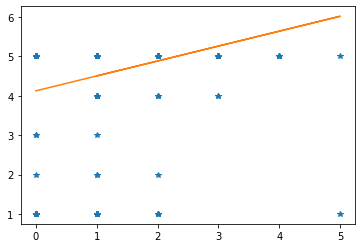

In [583]:
##---------Type the code below this line------------------##
x = df_new['pos_count']
y = y_class['score']
plt.plot(x, y, '*')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

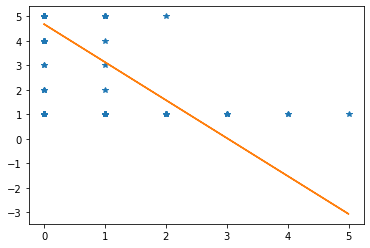

In [584]:
x = df_new['neg_count']
y = y_class['score']
plt.plot(x, y, '*')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

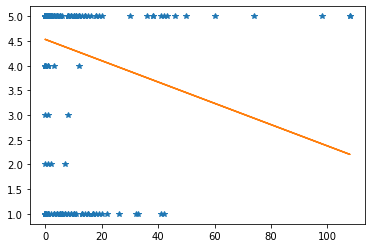

In [585]:
x = df_new['thumbsUpCount']
y = y_class['score']
plt.plot(x, y, '*')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

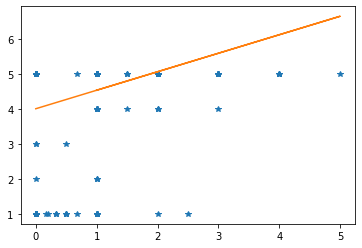

In [586]:
x = df_new['sentiment']
y = y_class['score']
plt.plot(x, y, '*')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

## 4.4 Can any other plot help to identify the optimal set of attributes that can be used for classification. The plot will be based on linear or nonlinear separations. If there is/are such plots, name them, explain why you think they can be helpful in the task and perform the plot as well.


# 5. Data Wrangling



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

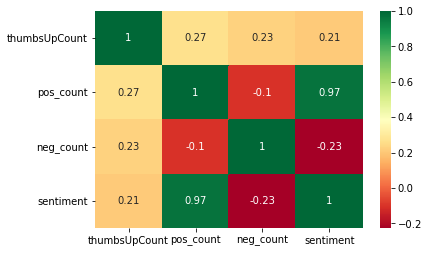

In [587]:
corrmat = df_new.corr()
top_corr_features = corrmat.index
g=sns.heatmap(df_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>three</b>) 

Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

In [588]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

[0.30449254 0.07222431 0.5073757  0.11590746]


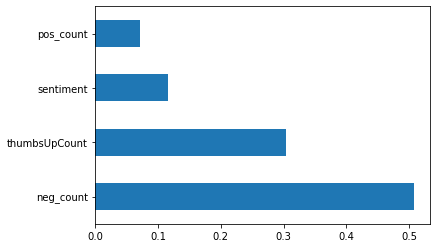

In [589]:
model = ExtraTreesClassifier()
model.fit(df_new, y_class)
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index= df_new.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

# Information gain:

In [590]:
df_plot = df_new.join(y_class)
df_plot.columns

Index(['thumbsUpCount', 'pos_count', 'neg_count', 'sentiment', 'score'], dtype='object')

In [591]:
X = df_plot.drop('score',axis=1)
y = df_plot['score']

<AxesSubplot:>

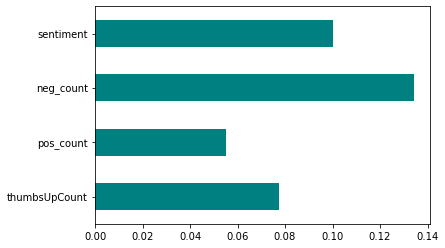

In [592]:
importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance, df_plot.columns[0: len(df_plot.columns)-1])
feat_importance.plot(kind='barh', color='teal')

# Gini Index

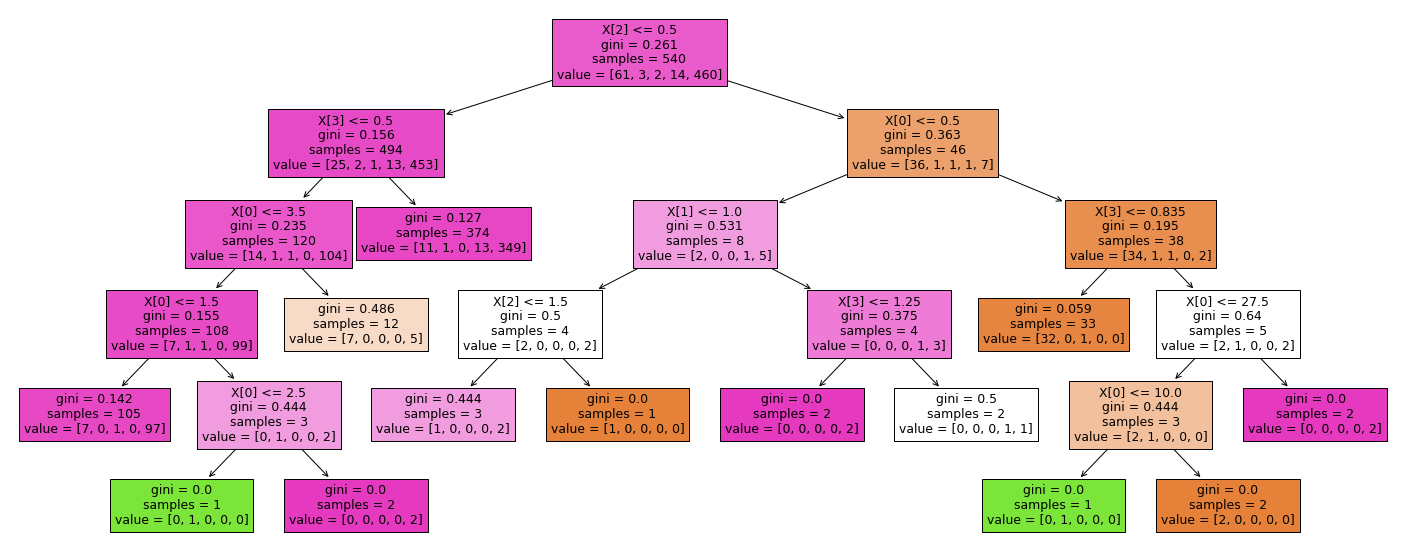

In [593]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y_class, random_state=1)
dt = DecisionTreeClassifier(criterion='gini', min_impurity_decrease=0.0009)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
fig = plt.figure(figsize=(25, 10))
tree.plot_tree(dt, filled=True, fontsize=8)
_ = tree.plot_tree(dt, filled=True)

In [594]:
dt.tree_.impurity

array([0.26087106, 0.15582947, 0.23513889, 0.15534979, 0.14204082,
       0.44444444, 0.        , 0.        , 0.48611111, 0.12714118,
       0.36294896, 0.53125   , 0.5       , 0.44444444, 0.        ,
       0.375     , 0.        , 0.5       , 0.19529086, 0.05876951,
       0.64      , 0.44444444, 0.        , 0.        , 0.        ])

# Chi-square Test

In [595]:
chi_scores = chi2(df_new, y_class)
chi_scores

(array([653.80319617,  30.57278555, 503.92701391,  45.84862993]),
 array([3.50092946e-140, 3.74135462e-006, 9.47757352e-108, 2.64811000e-009]))

<AxesSubplot:>

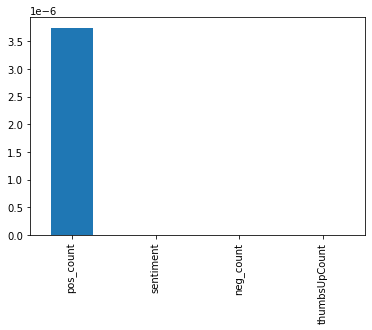

In [596]:
p_values = pd.Series(chi_scores[1],index = df_new.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

# Decesion tree using criterion='entropy'

In [597]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y_class, random_state=1)
dt = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.0065)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Predicted: \n", y_pred)
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred)
print("Confusion Matrix: \n",confusion_matrix(species, predictions))

Predicted: 
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 1 5 5 1 5 1 5 5 1 5 5 5 5 5 1 1 5 1 5 5 5 5
 5 5 1 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 2 1 5 5 5 5 5 5 5 5 5 5 5 1 5 5
 5 5 5 5 5 5 5 5 1 5 5 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 1 5 1 2 5
 5 5 1 5 5 5 5 5 1 5 5 5 5 5 5 1 2 5 5 1 5 5 5 5 1 5 5 5 5 5 5 5]
Confusion Matrix: 
 [[  0  24   4 152]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


In [598]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ",acc)

Accuracy:  0.9


In [599]:
print("Classification Report : ")
print(classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           1       0.83      0.77      0.80        26
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.93      0.95      0.94       149

    accuracy                           0.90       180
   macro avg       0.35      0.34      0.35       180
weighted avg       0.89      0.90      0.90       180



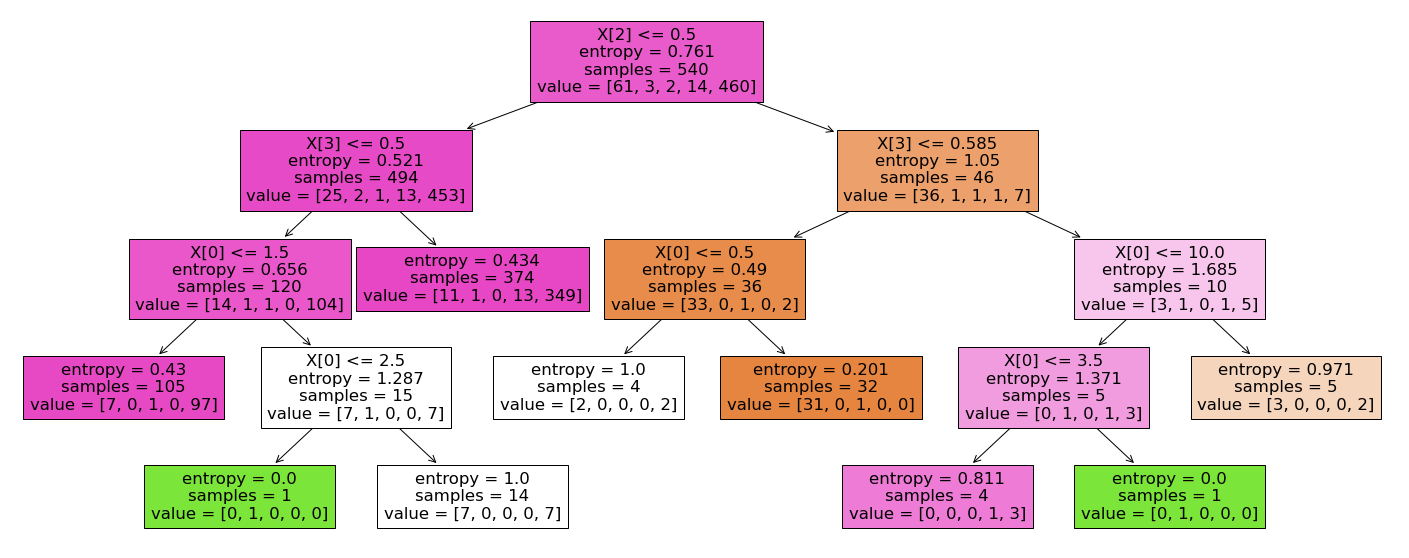

In [600]:
fig = plt.figure(figsize=(25,10))
tree.plot_tree(dt, filled=True, fontsize=8)
_ = tree.plot_tree(dt, filled=True)

In [601]:
dt.tree_.impurity

array([0.7605966 , 0.52086221, 0.65565143, 0.43002618, 1.28669267,
       0.        , 1.        , 0.43408294, 1.05032751, 0.4903415 ,
       1.        , 0.20062232, 1.6854753 , 1.37095059, 0.81127812,
       0.        , 0.97095059])

# Decesion tree using criterion='gini'

In [602]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y_class, random_state=1)
dt = DecisionTreeClassifier(criterion='gini', min_impurity_decrease=0.001)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Predicted: \n", y_pred)
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred)
print("Confusion Matrix: \n",confusion_matrix(species, predictions))

Predicted: 
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 1 5 5 1 5 1 5 5 1 5 5 5 5 5 1 1 5 1 5 5 5 5
 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 1 5 5 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 1 5 5
 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 1 5 5 5 5 1 5 5 5 5 5 5 5]
Confusion Matrix: 
 [[  0  20 160]
 [  0   0   0]
 [  0   0   0]]


In [603]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ",acc)

Accuracy:  0.9111111111111111


In [604]:
print("Classification Report : ")
print(classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           1       0.85      0.65      0.74        26
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.92      0.99      0.95       149

    accuracy                           0.91       180
   macro avg       0.35      0.33      0.34       180
weighted avg       0.88      0.91      0.89       180



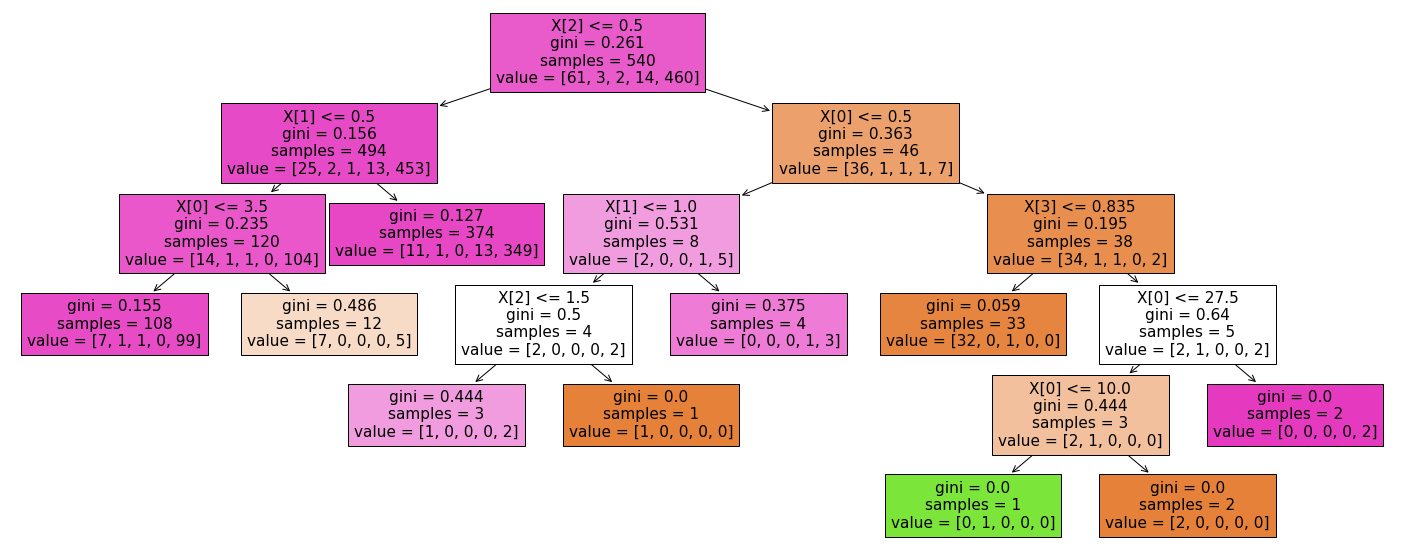

In [605]:
fig = plt.figure(figsize=(25, 10))
tree.plot_tree(dt, filled=True, fontsize=8)
_ = tree.plot_tree(dt, filled=True)

In [606]:
dt.tree_.impurity

array([0.26087106, 0.15582947, 0.23513889, 0.15534979, 0.48611111,
       0.12714118, 0.36294896, 0.53125   , 0.5       , 0.44444444,
       0.        , 0.375     , 0.19529086, 0.05876951, 0.64      ,
       0.44444444, 0.        , 0.        , 0.        ])

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [607]:
##---------Type the code below this line------------------##
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(dt, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1 = sfs1.fit(df_new, y_class)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-21 22:45:28] Features: 1/3 -- score: 0.9027777777777778[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-21 22:45:28] Features: 2/3 -- score: 0.9097222222222222[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-02-21 22:45:28] Features: 3/3 -- score: 0.9236111111111112

In [608]:
sfs1.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.90277778]),
  'avg_score': 0.9027777777777778,
  'feature_names': ('neg_count',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.90972222]),
  'avg_score': 0.9097222222222222,
  'feature_names': ('thumbsUpCount', 'neg_count')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.92361111]),
  'avg_score': 0.9236111111111112,
  'feature_names': ('thumbsUpCount', 'pos_count', 'neg_count')}}

In [609]:
# Top 3 feature indexes
sfs1.k_feature_idx_

(0, 1, 2)

In [610]:
# Top 3 features
sfs1.k_feature_names_

('thumbsUpCount', 'pos_count', 'neg_count')

In [611]:
# The prediction score for these 3 features
sfs1.k_score_

0.9236111111111112

## 5.5 Conclude the top 3 significant features with necessary justifications.

Top 3 features are:
1. thumbsUpCount(Thumbs up count)
2. pos_count(+ve word count)
3. neg_count(-ve word count)

Justification:
=> pos_count and neg_count together decice the sentiment score. This sentiment scrore is directlt realted to the * count that a user is giving while reviewing the app on play store. Ans thumbs up if he is giving +ve review.

Hence above mentioned features are the top 3 features as also suggested by mlxtend library.
